In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Importing the California House Price Dataset

In [217]:
data = pd.read_csv('housing.csv')

In [218]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

So from this we get to know that we have 20640 rows and 10 columns

In [219]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [221]:
data.dropna(inplace=True)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [223]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']


In [224]:
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [225]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [226]:
X_train ,X_test , Y_train , Y_test  = train_test_split(X,Y,test_size=0.2)

In [227]:
train_data = X_train.join(Y_train)

In [228]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10247,-117.86,33.89,22.0,4386.0,593.0,1915.0,592.0,6.6897,<1H OCEAN,289800.0
1085,-121.83,39.73,52.0,1741.0,401.0,753.0,377.0,2.0064,INLAND,77900.0
10242,-117.87,33.89,25.0,1142.0,162.0,486.0,150.0,7.1472,<1H OCEAN,270100.0
7695,-118.11,33.96,29.0,2784.0,582.0,1278.0,550.0,4.3882,<1H OCEAN,261600.0
17782,-121.83,37.37,43.0,821.0,149.0,370.0,135.0,4.2500,<1H OCEAN,209100.0
...,...,...,...,...,...,...,...,...,...,...
15561,-117.03,33.13,15.0,7000.0,1185.0,3555.0,1118.0,4.7022,<1H OCEAN,172800.0
513,-122.23,37.82,52.0,3051.0,381.0,1005.0,369.0,8.1872,NEAR BAY,466100.0
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,NEAR BAY,500001.0
10376,-117.62,33.64,2.0,7826.0,893.0,2985.0,790.0,10.1531,<1H OCEAN,484100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

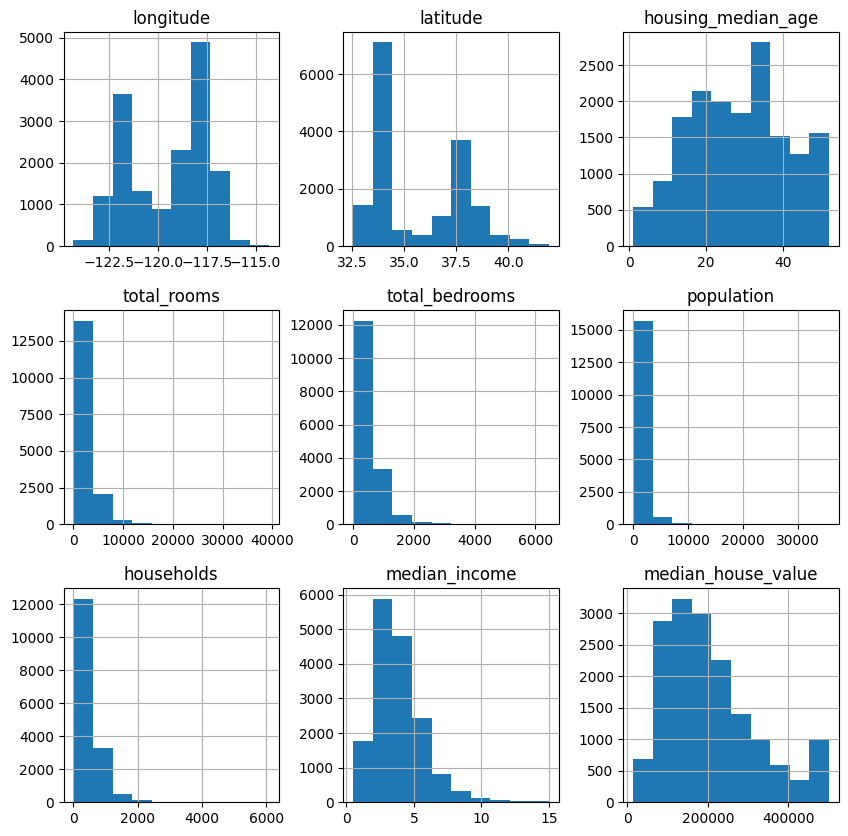

In [229]:
#now we will get some histogram of our data
train_data.hist(figsize=(10,10))

In [230]:
train_data.corr()

<ipython-input-230-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924675,-0.107456,0.043838,0.069881,0.097427,0.056121,-0.011616,-0.038291
latitude,-0.924675,1.000000,0.008439,-0.035053,-0.067372,-0.105638,-0.071748,-0.082660,-0.150903
housing_median_age,-0.107456,0.008439,1.000000,-0.360875,-0.319829,-0.295272,-0.302601,-0.114573,0.112641
total_rooms,0.043838,-0.035053,-0.360875,1.000000,0.930373,0.854669,0.918949,0.193506,0.130315
total_bedrooms,0.069881,-0.067372,-0.319829,0.930373,1.000000,0.872447,0.978924,-0.011625,0.048114
population,0.097427,-0.105638,-0.295272,0.854669,0.872447,1.000000,0.903147,0.002394,-0.029185
households,0.056121,-0.071748,-0.302601,0.918949,0.978924,0.903147,1.000000,0.010145,0.063375
median_income,-0.011616,-0.082660,-0.114573,0.193506,-0.011625,0.002394,0.010145,1.000000,0.685611
median_house_value,-0.038291,-0.150903,0.112641,0.130315,0.048114,-0.029185,0.063375,0.685611,1.000000


<ipython-input-231-34cc68dae82d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


<Axes: >

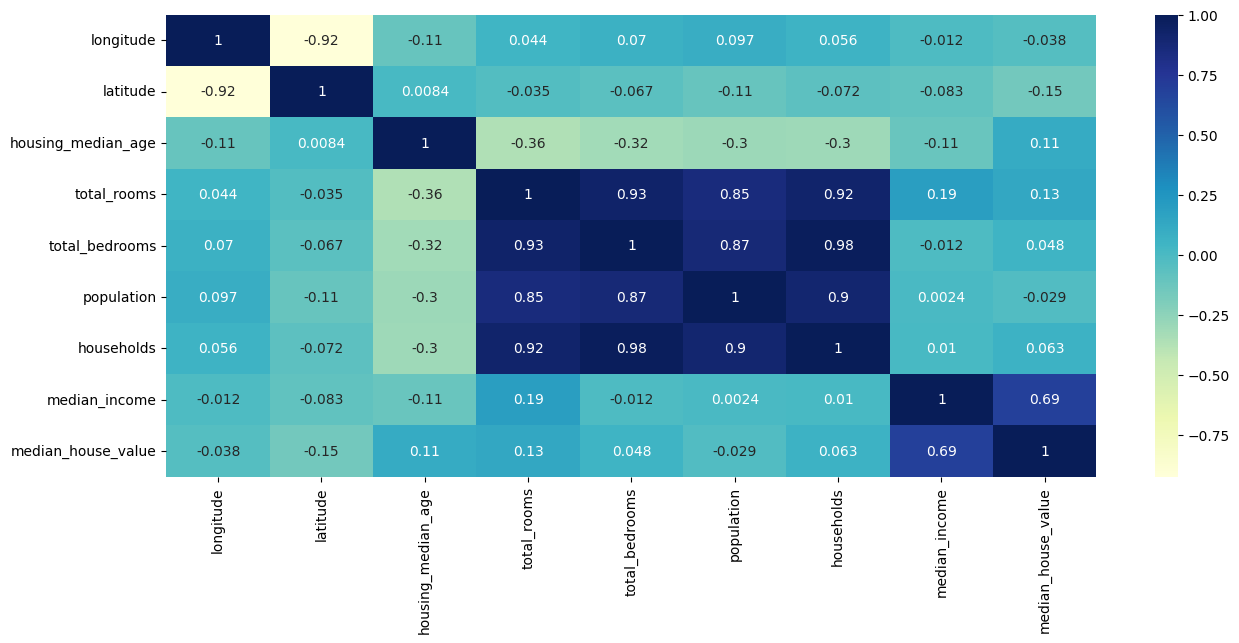

In [231]:
plt.figure(figsize=(15,6))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [232]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_rooms'] + 1)
train_data['population'] =np.log(train_data['total_rooms'] + 1)
train_data['households'] =np.log(train_data['total_rooms'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

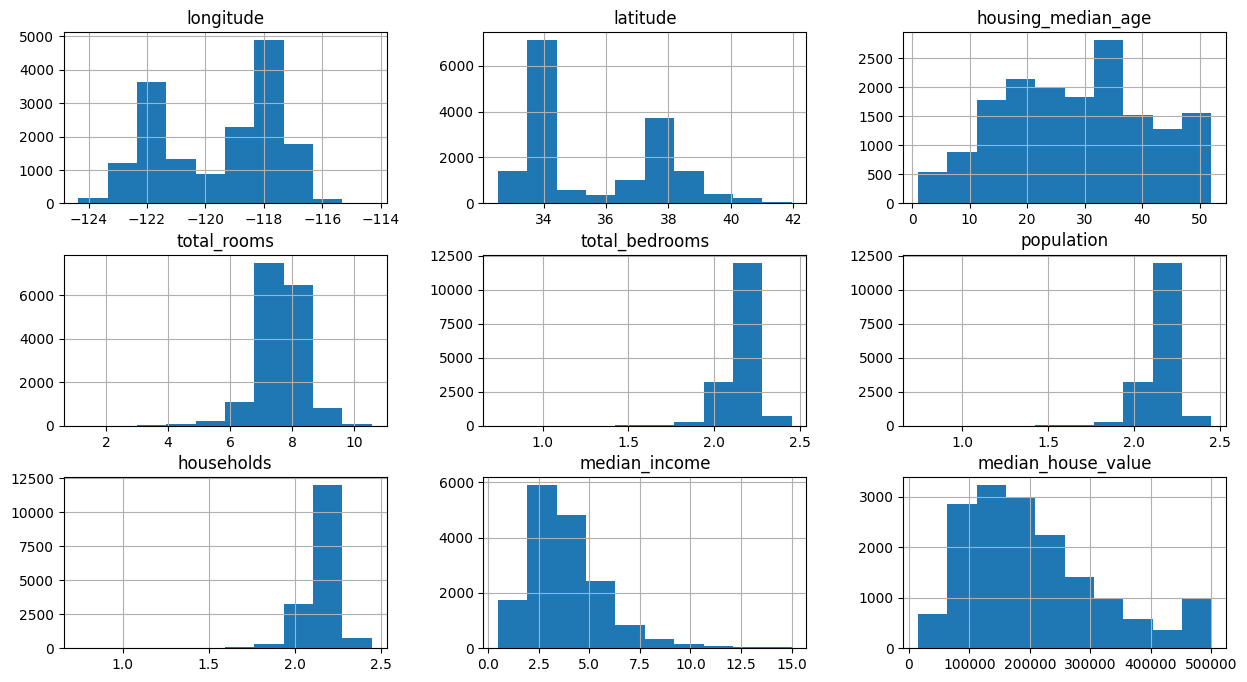

In [233]:
train_data.hist(figsize=(15,8))

now we will use ocean_proximity we have to change it to numerical value first

In [234]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7177
INLAND        5237
NEAR OCEAN    2116
NEAR BAY      1811
ISLAND           5
Name: ocean_proximity, dtype: int64

we will gice them numerical value

In [235]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10247,-117.86,33.89,22.0,8.386401,2.239262,2.239262,2.239262,6.6897,289800.0,1,0,0,0,0
1085,-121.83,39.73,52.0,7.462789,2.135679,2.135679,2.135679,2.0064,77900.0,0,1,0,0,0
10242,-117.87,33.89,25.0,7.041412,2.084605,2.084605,2.084605,7.1472,270100.0,1,0,0,0,0
7695,-118.11,33.96,29.0,7.932003,2.189641,2.189641,2.189641,4.3882,261600.0,1,0,0,0,0
17782,-121.83,37.37,43.0,6.711740,2.042744,2.042744,2.042744,4.2500,209100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15561,-117.03,33.13,15.0,8.853808,2.287858,2.287858,2.287858,4.7022,172800.0,1,0,0,0,0
513,-122.23,37.82,52.0,8.023552,2.199838,2.199838,2.199838,8.1872,466100.0,0,0,0,1,0
459,-122.25,37.87,52.0,6.413459,2.003297,2.003297,2.003297,1.1696,500001.0,0,0,0,1,0
10376,-117.62,33.64,2.0,8.965335,2.299113,2.299113,2.299113,10.1531,484100.0,1,0,0,0,0


In [236]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10247,-117.86,33.89,22.0,8.386401,2.239262,2.239262,2.239262,6.6897,<1H OCEAN,289800.0
1085,-121.83,39.73,52.0,7.462789,2.135679,2.135679,2.135679,2.0064,INLAND,77900.0
10242,-117.87,33.89,25.0,7.041412,2.084605,2.084605,2.084605,7.1472,<1H OCEAN,270100.0
7695,-118.11,33.96,29.0,7.932003,2.189641,2.189641,2.189641,4.3882,<1H OCEAN,261600.0
17782,-121.83,37.37,43.0,6.711740,2.042744,2.042744,2.042744,4.2500,<1H OCEAN,209100.0
...,...,...,...,...,...,...,...,...,...,...
15561,-117.03,33.13,15.0,8.853808,2.287858,2.287858,2.287858,4.7022,<1H OCEAN,172800.0
513,-122.23,37.82,52.0,8.023552,2.199838,2.199838,2.199838,8.1872,NEAR BAY,466100.0
459,-122.25,37.87,52.0,6.413459,2.003297,2.003297,2.003297,1.1696,NEAR BAY,500001.0
10376,-117.62,33.64,2.0,8.965335,2.299113,2.299113,2.299113,10.1531,<1H OCEAN,484100.0


now lets check the data on our heatmap what what changes we were able to make


<ipython-input-237-b727c2f9702f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


<Axes: >

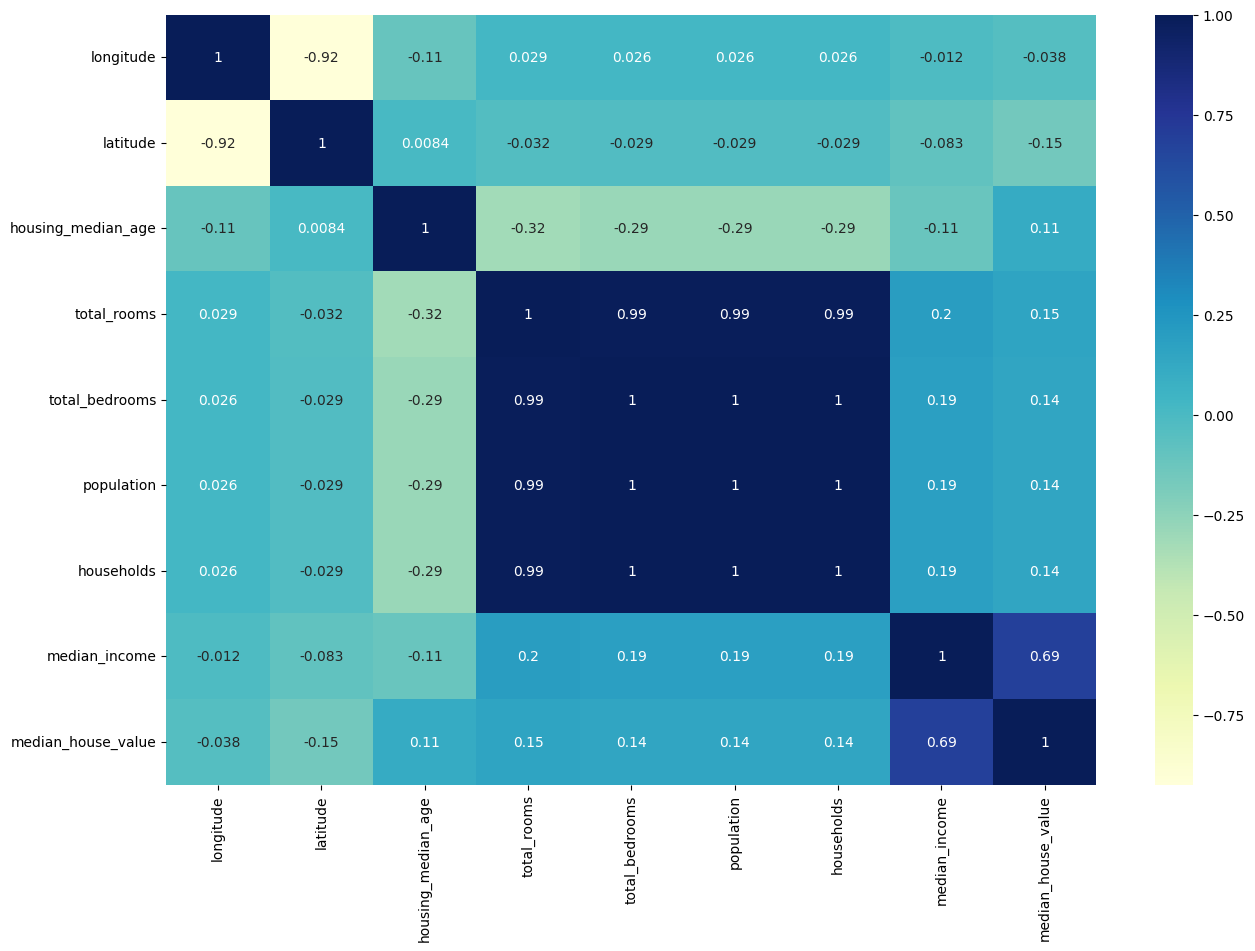

In [237]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

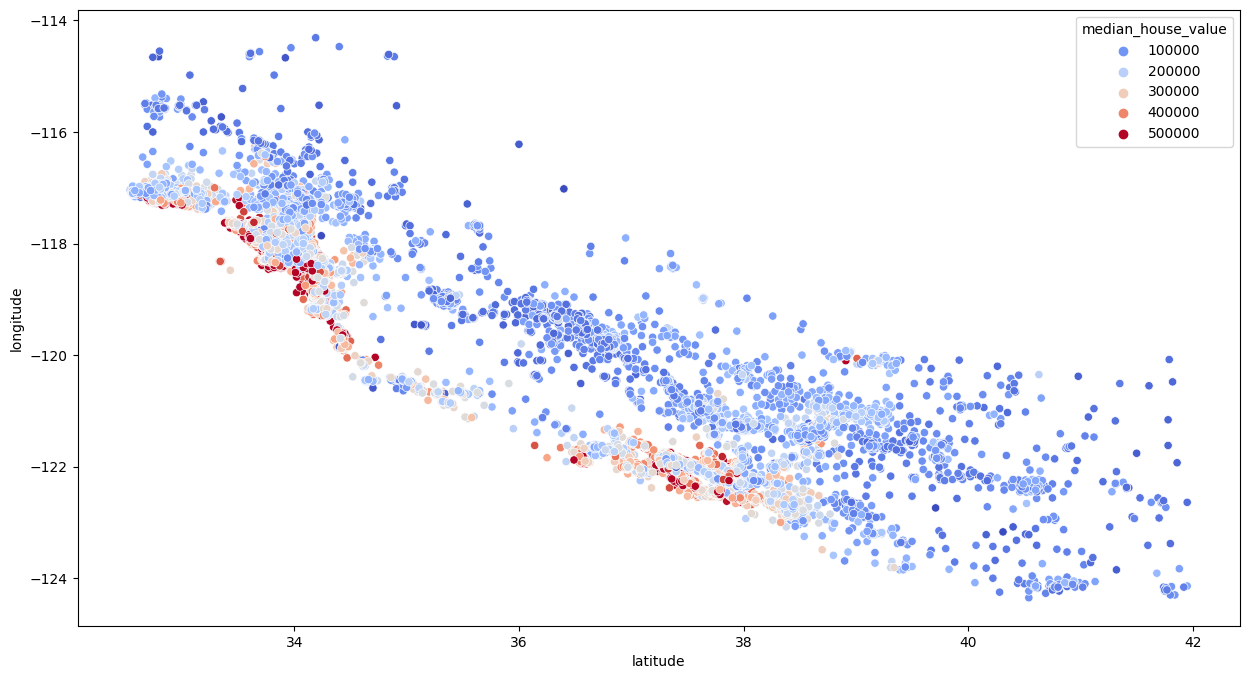

In [238]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y ='longitude',data=train_data, hue="median_house_value",palette = "coolwarm")

from this we can undestand that the graph uper part belong to house those are inland and bottom part shows that the houses near the ocean

from the graph we get to know that those house which are near the ocean are expansive more thn which are far from ocean

In [239]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


In [240]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)


this code replaces the categorical 'ocean_proximity' column with one-hot encoded binary columns, each representing a category of ocean proximity. This is a common preprocessing step when dealing with categorical data in machine learning because it allows models to work with categorical variables more effectively.

<Axes: >

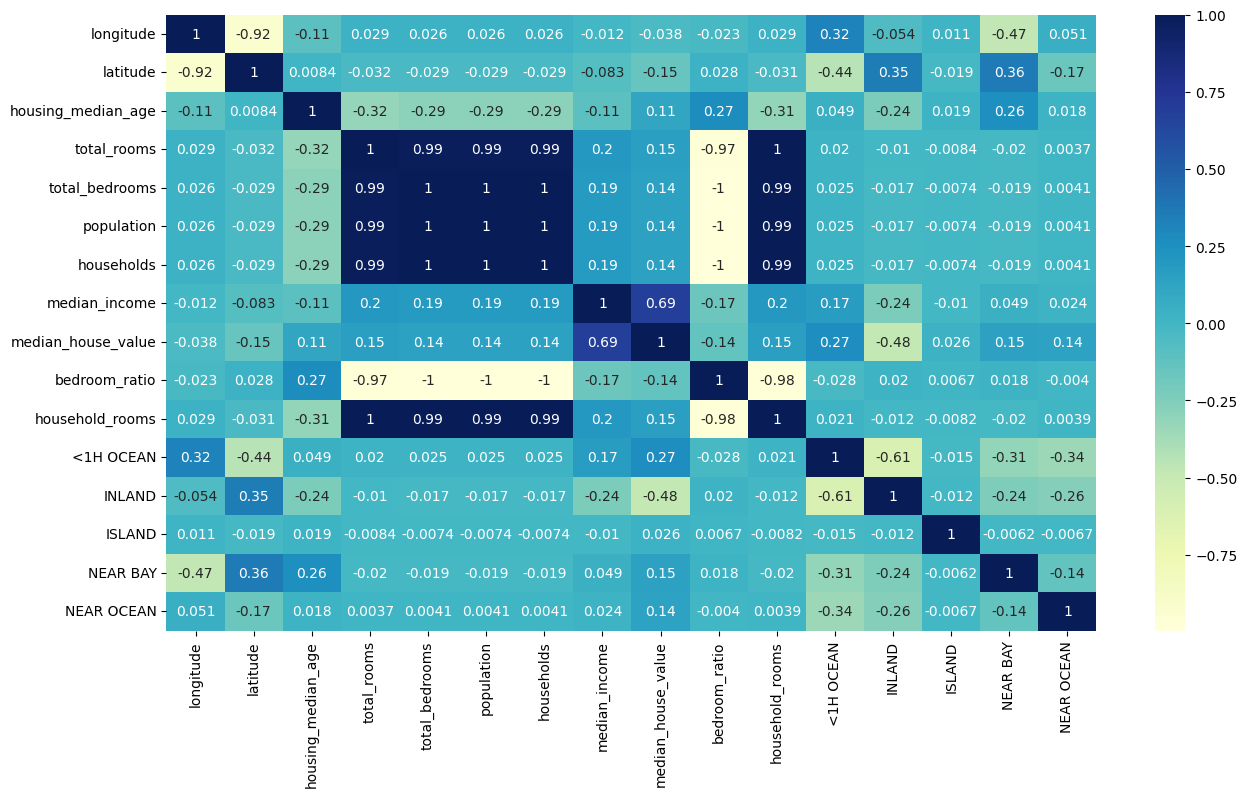

In [241]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

Now we will train Random Forest  Model

In [242]:
from sklearn.linear_model import LinearRegression
X_train , Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,Y_train)

LinearRegression()

In [243]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_rooms'] + 1)
test_data['population'] =np.log(test_data['total_rooms'] + 1)
test_data['households'] =np.log(test_data['total_rooms'] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [244]:
X_test , Y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


reg.fit(X_test,Y_test)

LinearRegression()

In [245]:
reg.score(X_test,Y_test)

0.6260900728652007

As we can see iam getting low score
but we will increase it in random forest

In [246]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [248]:
forest.score(X_train,Y_train)

0.9740970042344264

Here we got 97% accuracy thats nice

In [253]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest , param_grid , cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [254]:
best_forest = grid_search.best_estimator_

In [255]:
best_forest.score(X_train , Y_train)

0.9715447408440823

wow we got another good accuracy